In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test_X.csv', index_col=0)

In [4]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [24]:
#나이변수를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(train['age_group'])
labels=encoder.transform(train['age_group'])
labels=pd.DataFrame(labels)

#print(labels.value_counts())
#print(train['age_group'].value_counts())

age=7-labels
train['age_group']=age
train['age_group'].describe()

5    14215
4    14112
3     7836
2     5051
1     2889
0     1194
6      235
dtype: int64
6    14215
5    14112
4     7836
3     5051
2     2889
1     1194
7      235
Name: age_group, dtype: int64


count    45532.000000
mean         3.366687
std          1.343457
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: age_group, dtype: float64

In [25]:
# secret들을 +와- 로 바꿔주기 위한 data생성
Machiavelli=train[['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA','age_group']]
Machiavelli.columns=['a_secret','b_+','c_+','d_secret','e_-','f_-','g_secret','h_+','i_secret','j_+','k_-','l_secret','m_+','n_secret','o_+','p_secret','q_-','r_-','s_+','t_secret','age']

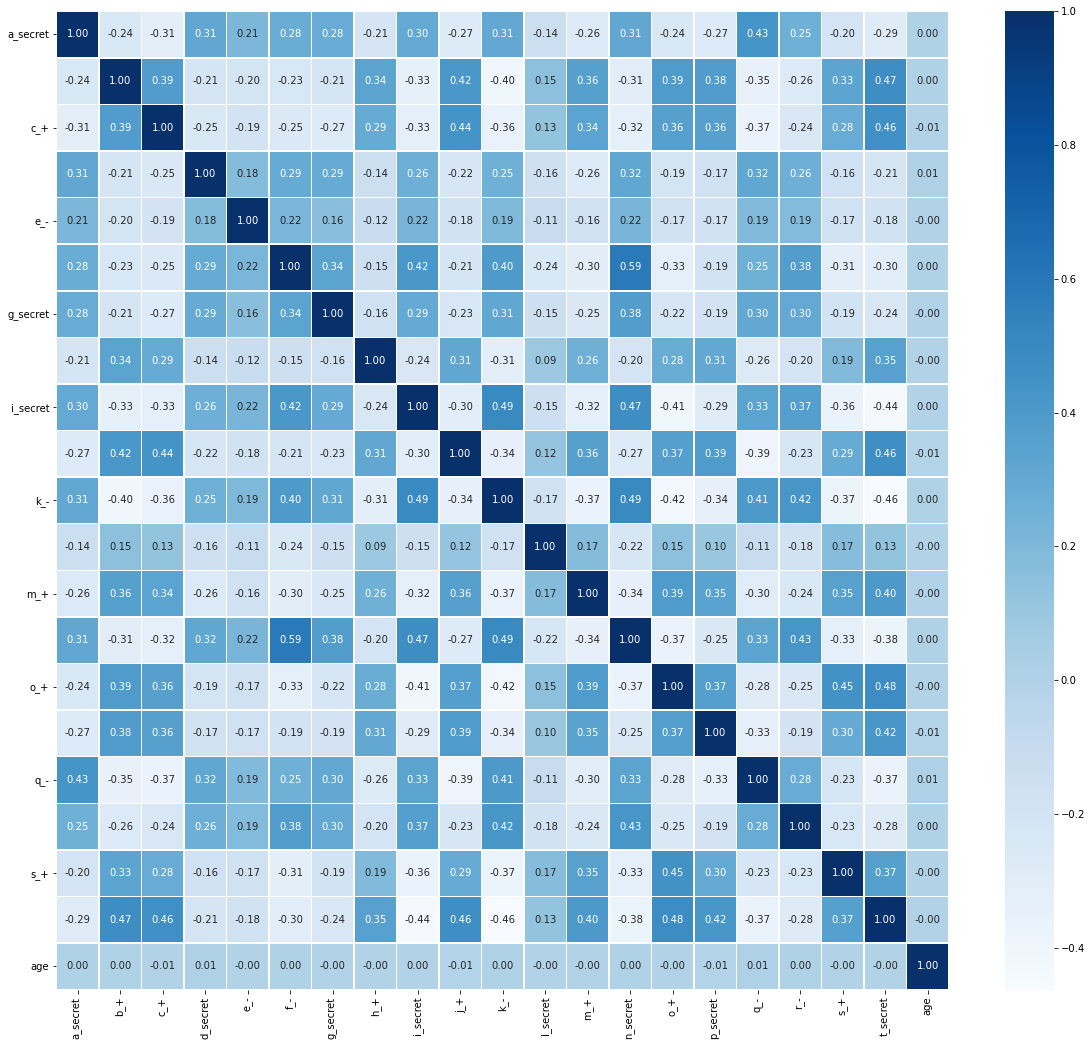

In [29]:
sns.heatmap(data=Machiavelli.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

### age를 제외한 변수들 끼리 명백한 +,- 관계를 보임으로 이를 통하여 secret 변수들의 +,-를 선택할 수 있다.

a_secet-> -

d_secret-> -

g_secret-> -

i_secret-> -

l_secret-> +

n_secret-> -

p_secret-> +

t_secret-> +

<AxesSubplot:xlabel='a_-', ylabel='count'>

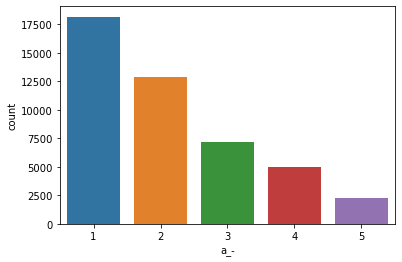

In [41]:
Machiavelli.columns=['a_-','b_+','c_+','d_-','e_-','f_-','g_-','h_+','i_-','j_+','k_-','l_+','m_+','n_-','o_+','p_+','q_-','r_-','s_+','t_+','age']
sns.countplot('a_-',data=Machiavelli)


In [33]:
for i in ["QaA","QdA","QeA","QfA","QgA","QiA","QkA","QnA","QqA","QrA"]:
    train[i]=6-train[i]
    test[i]=6-test[i]

<AxesSubplot:xlabel='QaA', ylabel='count'>

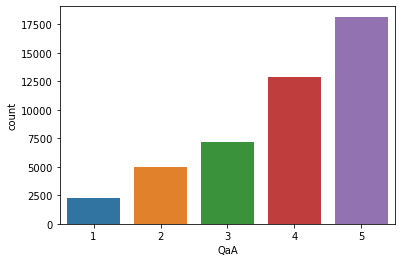

In [42]:
sns.countplot('QaA',data=train)

In [39]:
train['Marchiavelli Score']=train[['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']].sum(axis=1)
test['Marchiavelli Score']=test[['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']].sum(axis=1)

In [40]:
train['Marchiavelli Score'].describe()

count    45532.000000
mean        67.049482
std         15.893213
min         20.000000
25%         55.000000
50%         67.000000
75%         79.000000
max        100.000000
Name: Marchiavelli Score, dtype: float64

In [43]:
test['Marchiavelli Score'].describe()

count    11383.000000
mean        67.199596
std         15.822510
min         20.000000
25%         55.000000
50%         68.000000
75%         80.000000
max        100.000000
Name: Marchiavelli Score, dtype: float64